In [1]:
import pandas as pd
from itertools import permutations
import  numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use("tableau-colorblind10")
from tqdm.auto import tqdm
import yfinance as yf
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
start = "2019-01-01"
end = "2025-03-13"
data = yf.download("ITC.NS HINDUNILVR.NS NESTLEIND.NS VBL.NS BRITANNIA.NS GODREJCP.NS DABUR.NS MARICO.NS JUBLFOOD.BO TATACONSUM.NS", start=start,end = end,period="1d")
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


Price             Close                                                    \
Ticker     BRITANNIA.NS    DABUR.NS GODREJCP.NS HINDUNILVR.NS      ITC.NS   
Date                                                                        
2019-01-01  2792.422119  400.957489  776.395142   1649.655518  221.355148   
2019-01-02  2804.840820  395.777374  775.722107   1634.542969  219.710831   
2019-01-03  2821.983398  401.100159  783.655762   1638.023315  218.340546   
2019-01-04  2810.105225  398.486267  772.596680   1631.886719  219.984863   
2019-01-07  2829.092773  399.626862  769.855957   1634.863525  220.532959   

Price                                                                     ...  \
Ticker     JUBLFOOD.BO   MARICO.NS NESTLEIND.NS TATACONSUM.NS     VBL.NS  ...   
Date                                                                      ...   
2019-01-01  238.171280  337.430786  1015.000244    208.553329  47.109482  ...   
2019-01-02  235.660995  337.929169  1016.875671    204.269943  45.971111  ...   
2019-01-03  235.546921  342.642151  1032.701660    199.938934  46.260040  ...   
2019-01-04  230.925735  343.367279   999.901978    203.508453  46.652981  ...   
2019-01-07  231.448730  350.572662   993.903198    204.603088  46.904343  ...   

Price            Volume                                              \
Ticker     BRITANNIA.NS DABUR.NS GODREJCP.NS HINDUNILVR.NS   ITC.NS   
Date                                                                  
2019-01-01       140863  1617567      297709        807345  2490548   
2019-01-02       152324  2550167     1265919       1598707  9934187   
2019-01-03       311498  3271824      597625       1182624  6114946   
2019-01-04       170818  1831799      631173       1454134  7805148   
2019-01-07       152966  1394010      513788        909032  9757529   

Price                                                                 
Ticker     JUBLFOOD.BO MARICO.NS NESTLEIND.NS TATACONSUM.NS   VBL.NS  
Date                                                                  
2019-01-01    159200.0    877238       317090        716275  1194564  
2019-01-02    705000.0   1160137       281670       1081778   566763  
2019-01-03    198735.0   2388605      1692910       2096553   299986  
2019-01-04    481050.0   2011585      2061630       1213181  1052021  
2019-01-07    382500.0   3660860       859590        871903  5214425  

[5 rows x 50 columns]

In [3]:
company = data["Close"].columns.tolist()
ma=[50,100,200]
new = pd.DataFrame()
for m in ma:
    for cmp in company:
        new[f"MA{m}{cmp}"] = data["Close"][cmp].ewm(com=m).mean()

new.tail()

,MA50BRITANNIA.NS,MA50DABUR.NS,MA50GODREJCP.NS,MA50HINDUNILVR.NS,MA50ITC.NS,MA50JUBLFOOD.BO,MA50MARICO.NS,MA50NESTLEIND.NS,MA50TATACONSUM.NS,MA50VBL.NS,...,MA200BRITANNIA.NS,MA200DABUR.NS,MA200GODREJCP.NS,MA200HINDUNILVR.NS,MA200ITC.NS,MA200JUBLFOOD.BO,MA200MARICO.NS,MA200NESTLEIND.NS,MA200TATACONSUM.NS,MA200VBL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-06,5048.192027,529.037869,1149.592997,2406.991206,440.730549,665.775698,638.212826,2257.703067,1003.290522,562.085036,...,5009.476655,548.147063,1163.747446,2471.549263,428.773014,594.803251,596.056229,2300.987943,1002.178270,518.114662
2025-03-07,5042.310811,528.386146,1147.548037,2403.021771,440.008381,664.515393,637.652771,2257.325555,1002.481884,560.627486,...,5008.176386,547.886503,1163.157868,2470.220261,428.649207,594.840060,596.123893,2300.676657,1001.978529,517.963520
2025-03-10,5036.338054,527.699162,1145.517683,2399.977227,439.321942,663.257483,637.057619,2257.150542,1001.595964,559.083810,...,5006.830080,547.615046,1162.564755,2469.112906,428.531492,594.870837,596.179522,2300.416447,1001.756140,517.784012
2025-03-11,5030.959853,527.108002,1143.432043,2396.388456,438.672493,662.280676,636.387862,2257.037784,1000.777415,557.635108,...,5005.611679,547.365845,1161.950455,2467.857758,428.420337,594.967218,596.212974,2300.172466,1001.547551,517.621825
2025-03-12,5026.275342,526.575492,1141.470631,2392.398485,438.157346,661.101946,635.681237,2255.831161,999.692564,556.080498,...,5004.548672,547.129832,1161.360368,2466.489151,428.340595,595.006229,596.233566,2299.651457,1001.268325,517.426349


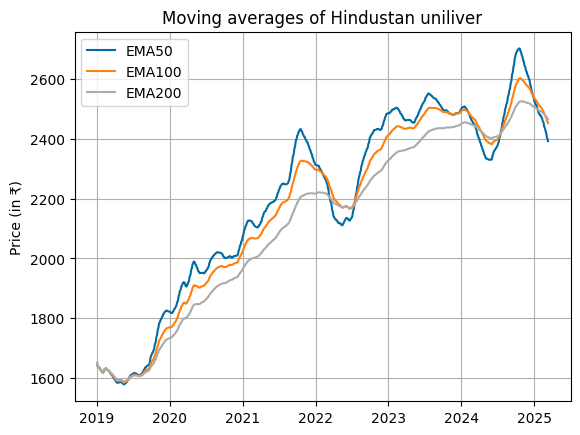

In [4]:
plt.plot(new[["MA50HINDUNILVR.NS","MA100HINDUNILVR.NS","MA200HINDUNILVR.NS"]])
plt.title("Moving averages of Hindustan uniliver")
plt.legend(["EMA50","EMA100","EMA200"])
plt.grid(True)
plt.ylabel("Price (in ₹)")
plt.savefig('foo.jpeg')

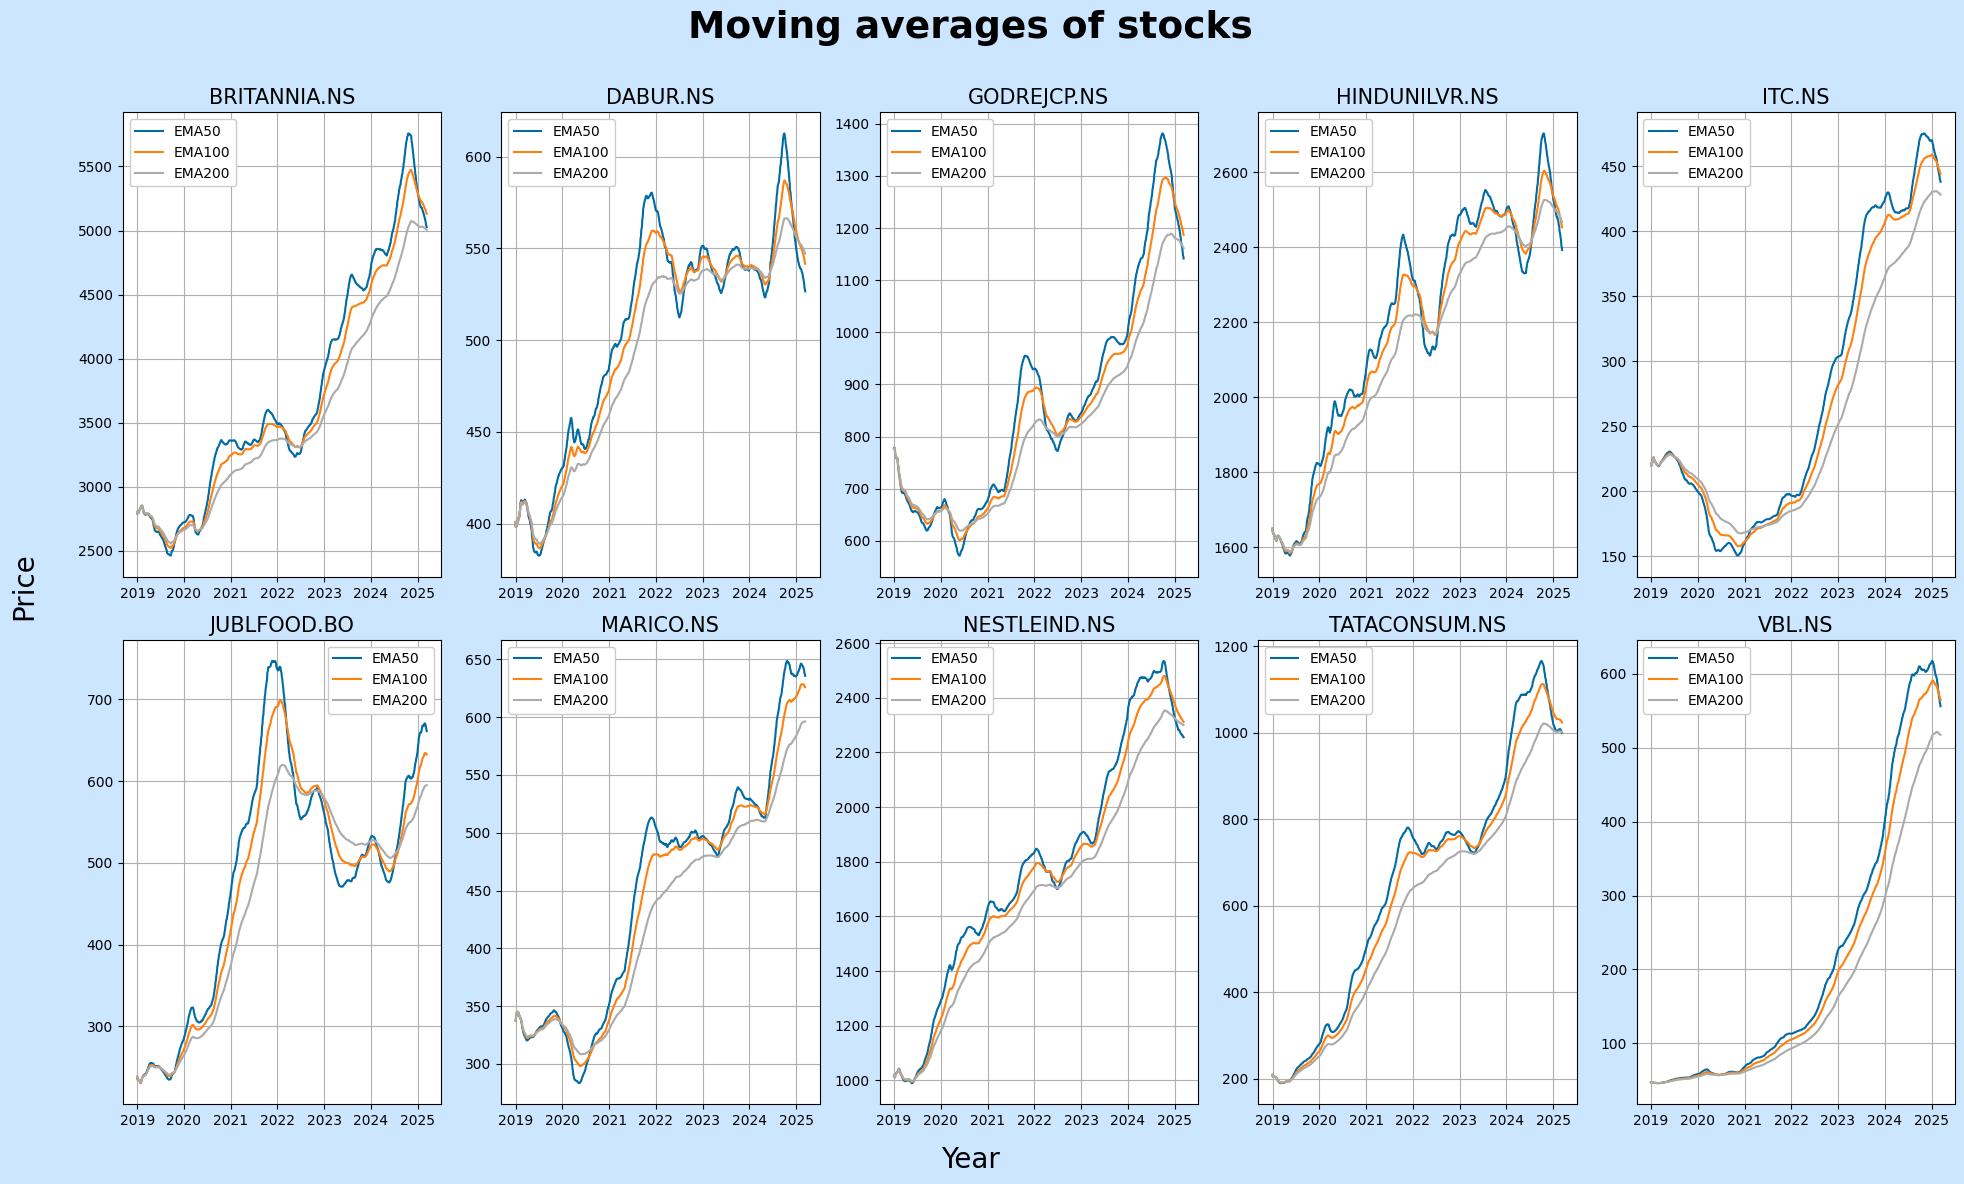

In [5]:
fig, axs = plt.subplots(2, 5,figsize = (20,12),facecolor="#cce6ff")
fig.suptitle("Moving averages of stocks",fontsize=27,fontweight ="bold")
fig.supxlabel('Year',fontsize=20)
fig.supylabel('Price',fontsize=20)
axs = axs.ravel()
for i in range(10):
    axs[i].plot(new[f"MA50{company[i]}"])
    axs[i].plot(new[f"MA100{company[i]}"])
    axs[i].plot(new[f"MA200{company[i]}"])
    axs[i].set_title(str(company[i]),fontsize=15)
    axs[i].legend(["EMA50","EMA100","EMA200"],facecolor="white",framealpha=1)
    axs[i].grid(True)

plt.tight_layout(rect=(0.025,0,1,0.97))
plt.show()

In [6]:
corr_df = pd.DataFrame()
for cmp in company:
  corr_df[f"log_return_of{cmp}"] = np.log(data["Close"][f"{cmp}"]/data["Close"][f"{cmp}"].shift(1))

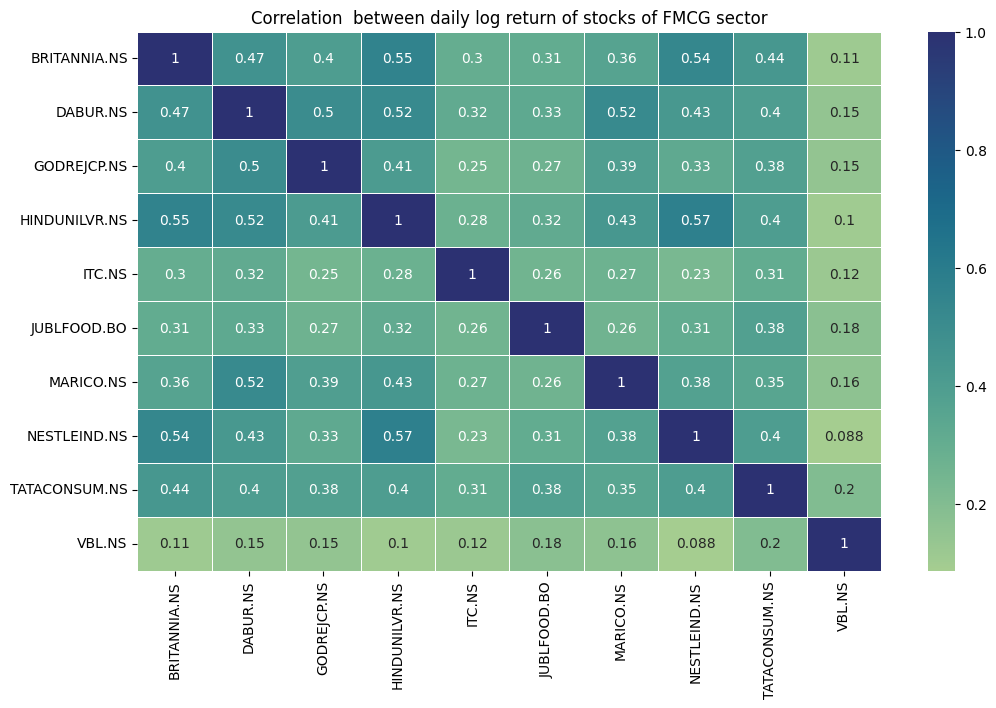

In [7]:

plt.figure(figsize=(12,7))
sns_plot = sns.heatmap(corr_df.dropna().corr(), annot=True, cmap='crest',linewidth=.5,xticklabels=company,yticklabels=company)
plt.title("Correlation  between daily log return of stocks of FMCG sector")
plt.show()
sns_plot.figure.savefig("output.png")

In [8]:
df2 = yf.download(['TCS.NS','WIPRO.NS','INFY.NS','HCLTECH.NS','TECHM.NS','LTTS.NS','ECLERX.NS','OFSS.NS','COFORGE.NS','MPHASIS.NS'],start=start,end=end)
df2.head()

[*********************100%***********************]  10 of 10 completed


Price             Close                                                   \
Ticker       COFORGE.NS   ECLERX.NS  HCLTECH.NS     INFY.NS      LTTS.NS   
Date                                                                       
2019-01-01  1065.413696  710.406067  403.052917  571.949280  1604.162598   
2019-01-02  1067.078979  721.903076  397.384094  575.389343  1590.285767   
2019-01-03  1047.973145  712.652588  398.223907  575.475342  1515.574585   
2019-01-04  1038.766724  709.910583  391.505341  568.509216  1517.583862   
2019-01-07  1056.068970  706.970154  395.368561  577.668335  1526.414551   

Price                                                                     ...  \
Ticker      MPHASIS.NS      OFSS.NS       TCS.NS    TECHM.NS    WIPRO.NS  ...   
Date                                                                      ...   
2019-01-01  867.911682  2826.397949  1715.514893  600.326111  116.354469  ...   
2019-01-02  853.929871  2812.377686  1733.997559  594.440430  115.962646  ...   
2019-01-03  818.888855  2724.238525  1712.945679  577.076111  115.944832  ...   
2019-01-04  803.051392  2726.928955  1692.119507  568.602539  115.570808  ...   
2019-01-07  798.606567  2725.413330  1711.097656  573.945435  115.499588  ...   

Price          Volume                                                   \
Ticker     COFORGE.NS ECLERX.NS HCLTECH.NS  INFY.NS LTTS.NS MPHASIS.NS   
Date                                                                     
2019-01-01     332711      2028     717468  2943390   36717     114361   
2019-01-02     931011      2113    2270096  7416655   65474     152577   
2019-01-03     435893      8643    2809224  6827249  155781     561410   
2019-01-04     723008      1821    3077278  7889310  152819     466413   
2019-01-07     399650      1669    2344752  8046340   59677     203261   

Price                                          
Ticker     OFSS.NS   TCS.NS TECHM.NS WIPRO.NS  
Date                                           
2019-01-01   11336  1094883   815535  4036542  
2019-01-02   34252  2100463  2576769  8822139  
2019-01-03   31202  2611668  3558015  9446080  
2019-01-04   18934  4280862  3926171  6414073  
2019-01-07   14801  1856423  1885000  5076276  

[5 rows x 50 columns]

In [9]:
it_cmp = df2["Close"].columns.tolist()
for cmp in it_cmp:
  corr_df[f"log_return_of{cmp}"] = np.log(df2["Close"][f"{cmp}"]/df2["Close"][f"{cmp}"].shift(1))

In [10]:
new_list = company+it_cmp

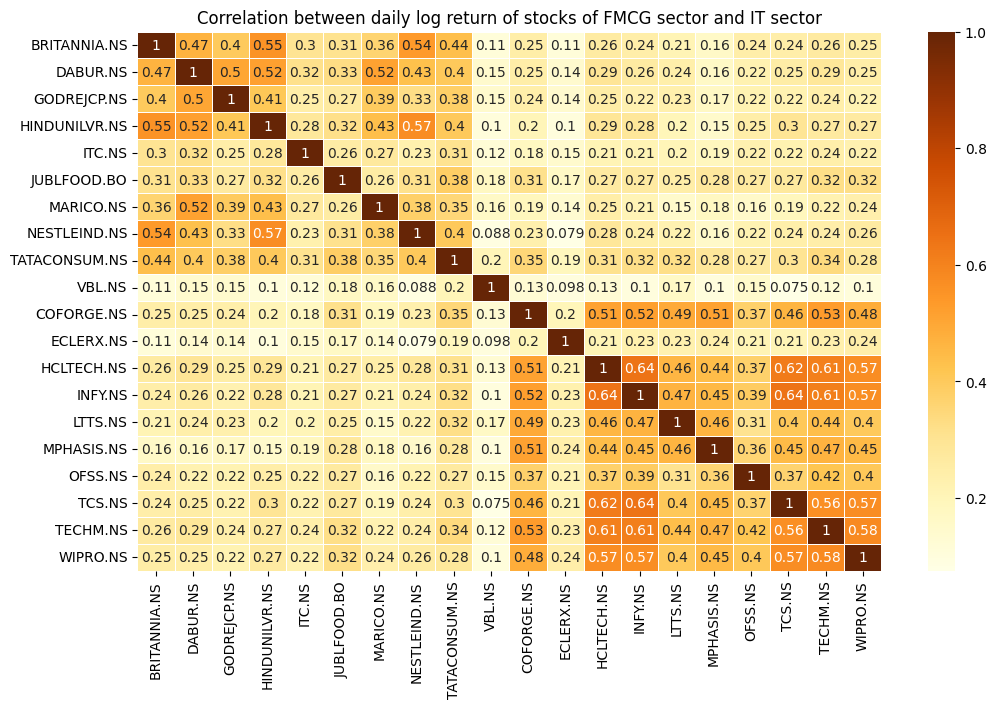

In [11]:
plt.figure(figsize=(12,7))
sns_plot = sns.heatmap(corr_df.dropna().corr(),cmap="YlOrBr", annot=True,linewidth=.5,xticklabels=new_list,yticklabels=new_list)
plt.title("Correlation between daily log return of stocks of FMCG sector and IT sector")
plt.show()
sns_plot.figure.savefig("output.jpeg")

## Decomposition

In [ ]:
hlvr_high = data["High"]["HINDUNILVR.NS"]

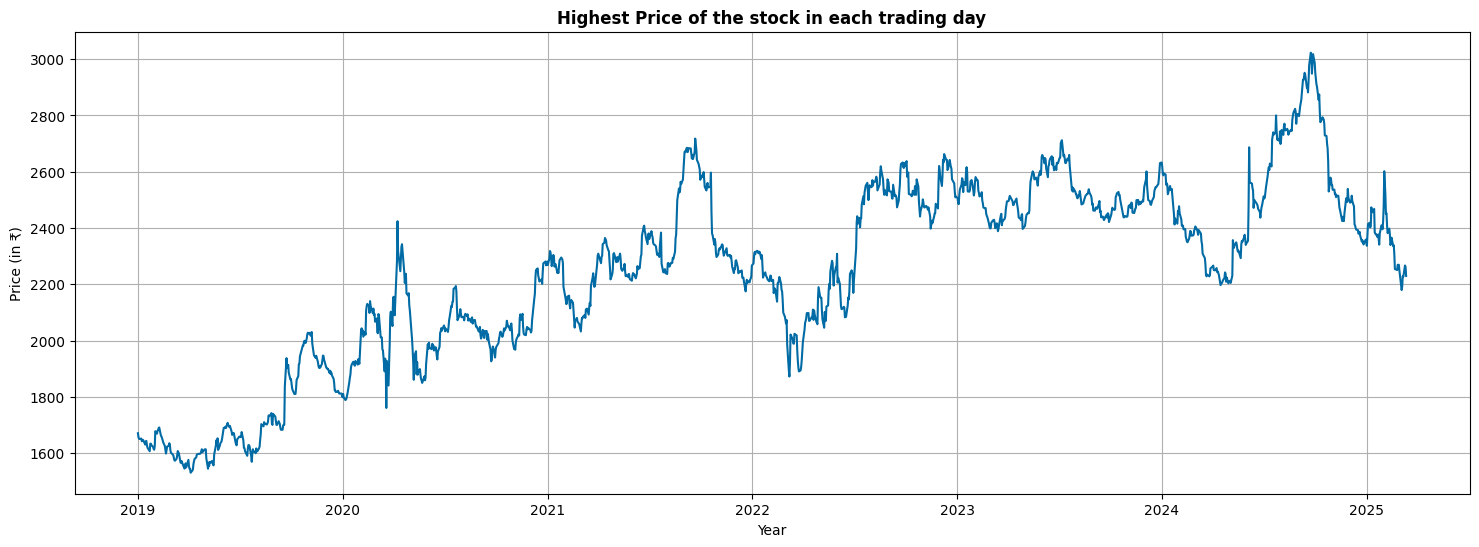

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(hlvr_high)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Price (in ₹)")
plt.title("Highest Price of the stock in each trading day",fontweight ="bold")
plt.show()

## Stabilizing variance

In [ ]:
hlvr_transformed = np.log(hlvr_high)
hlvr_transformed = hlvr_transformed.resample("B").ffill()
hlvr_transformed.head()

,HINDUNILVR.NS
Date,
2019-01-01,7.421395
2019-01-02,7.412615
2019-01-03,7.409626
2019-01-04,7.408821
2019-01-07,7.409931


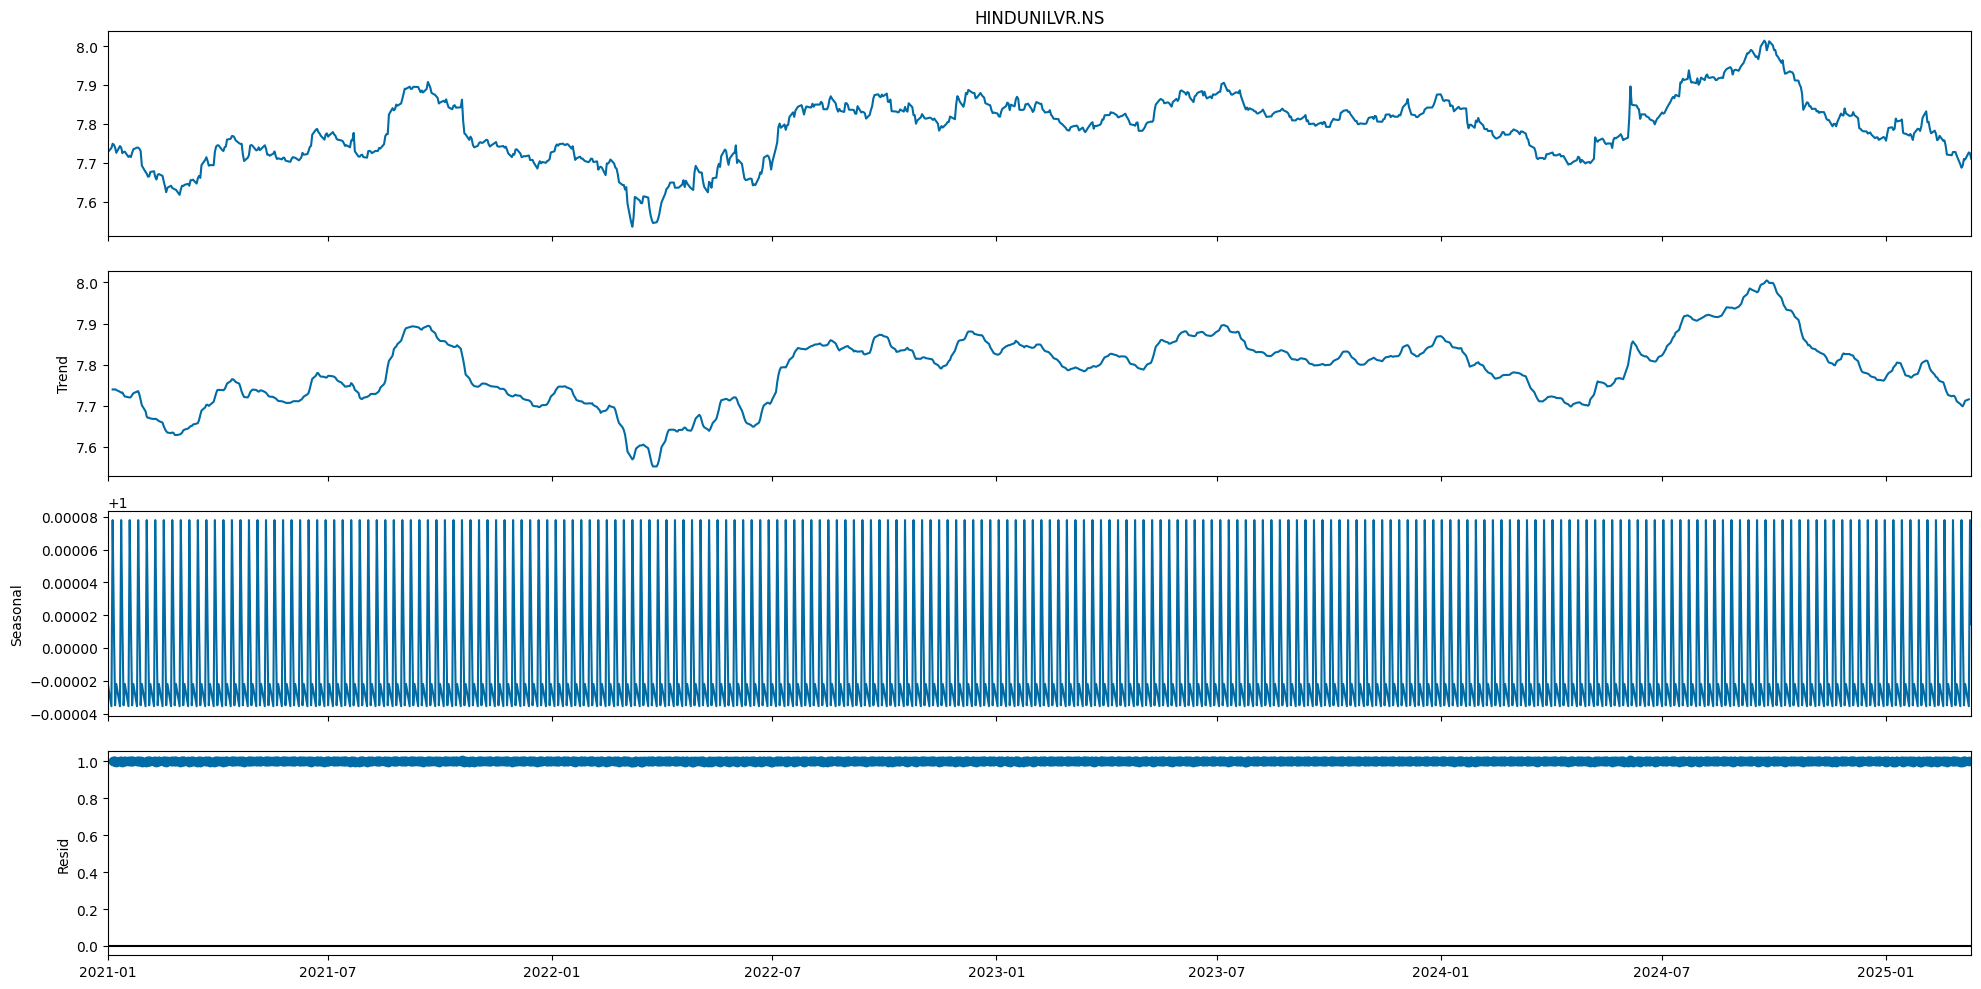

In [ ]:
plt.rcParams.update({'figure.figsize': (20, 10)})
result = seasonal_decompose(hlvr_transformed.loc["2021-01-01":,].dropna(), model='multiplicative')
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(hlvr_transformed.dropna())
print(f"Test statistic: {res[0]}")
print(f"P-value : {res[1]}")

Test statistic: -2.3512364956414062
P-value : 0.15597494725867972


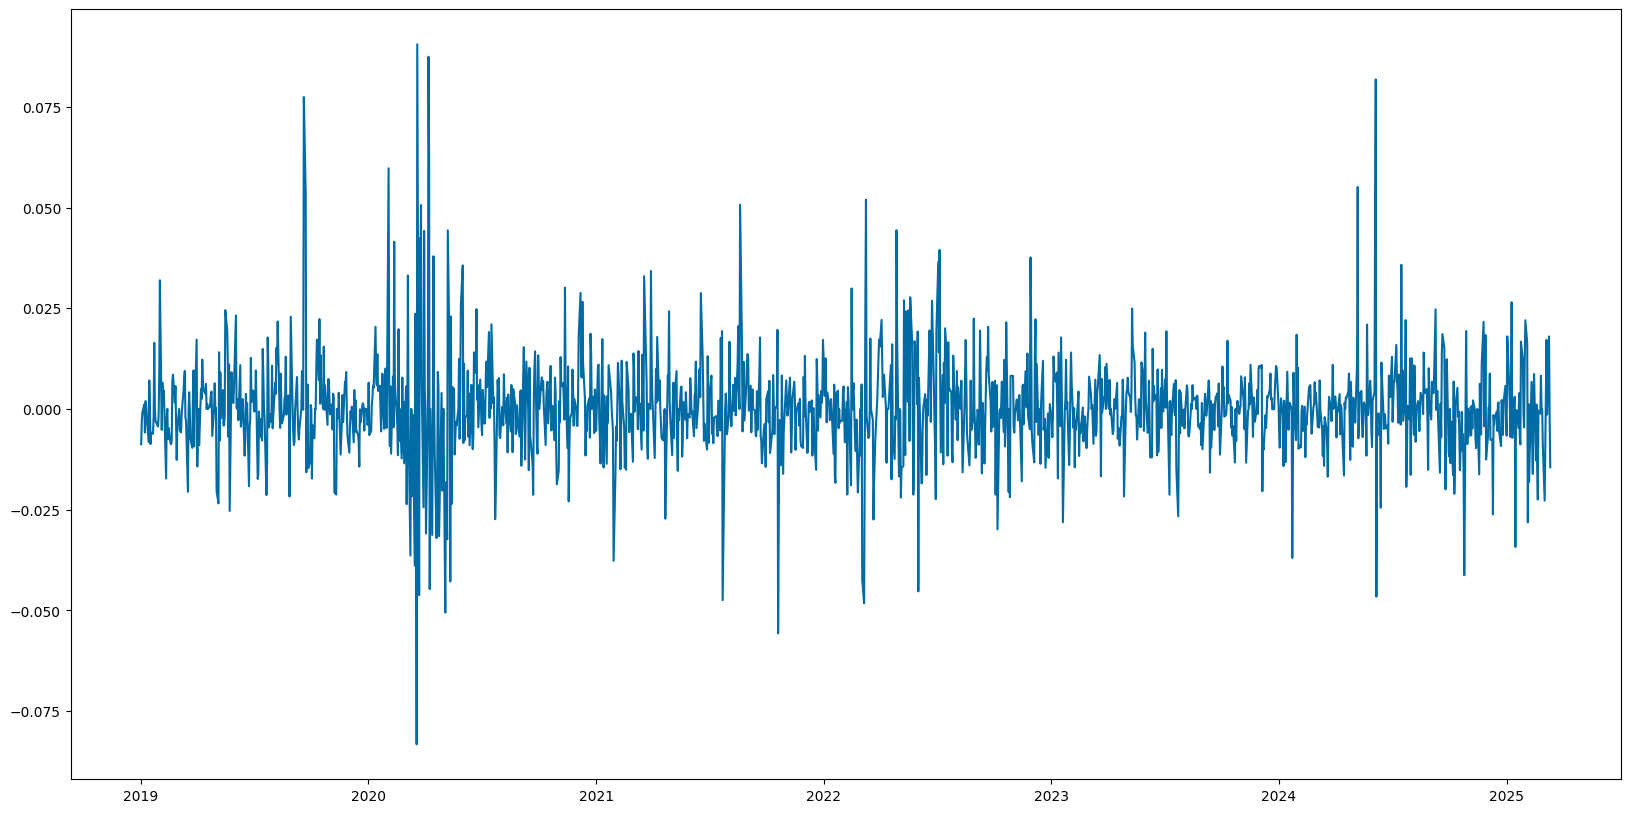

In [ ]:
hlvr_diff = hlvr_transformed.diff()
plt.plot(hlvr_diff)
plt.show()

In [ ]:
res = adfuller(hlvr_diff.dropna())
print(f"Test statistic: {res[0]}")
print(f"P-value : {res[1]}")

Test statistic: -17.234669877816465
P-value : 6.161242788927447e-30


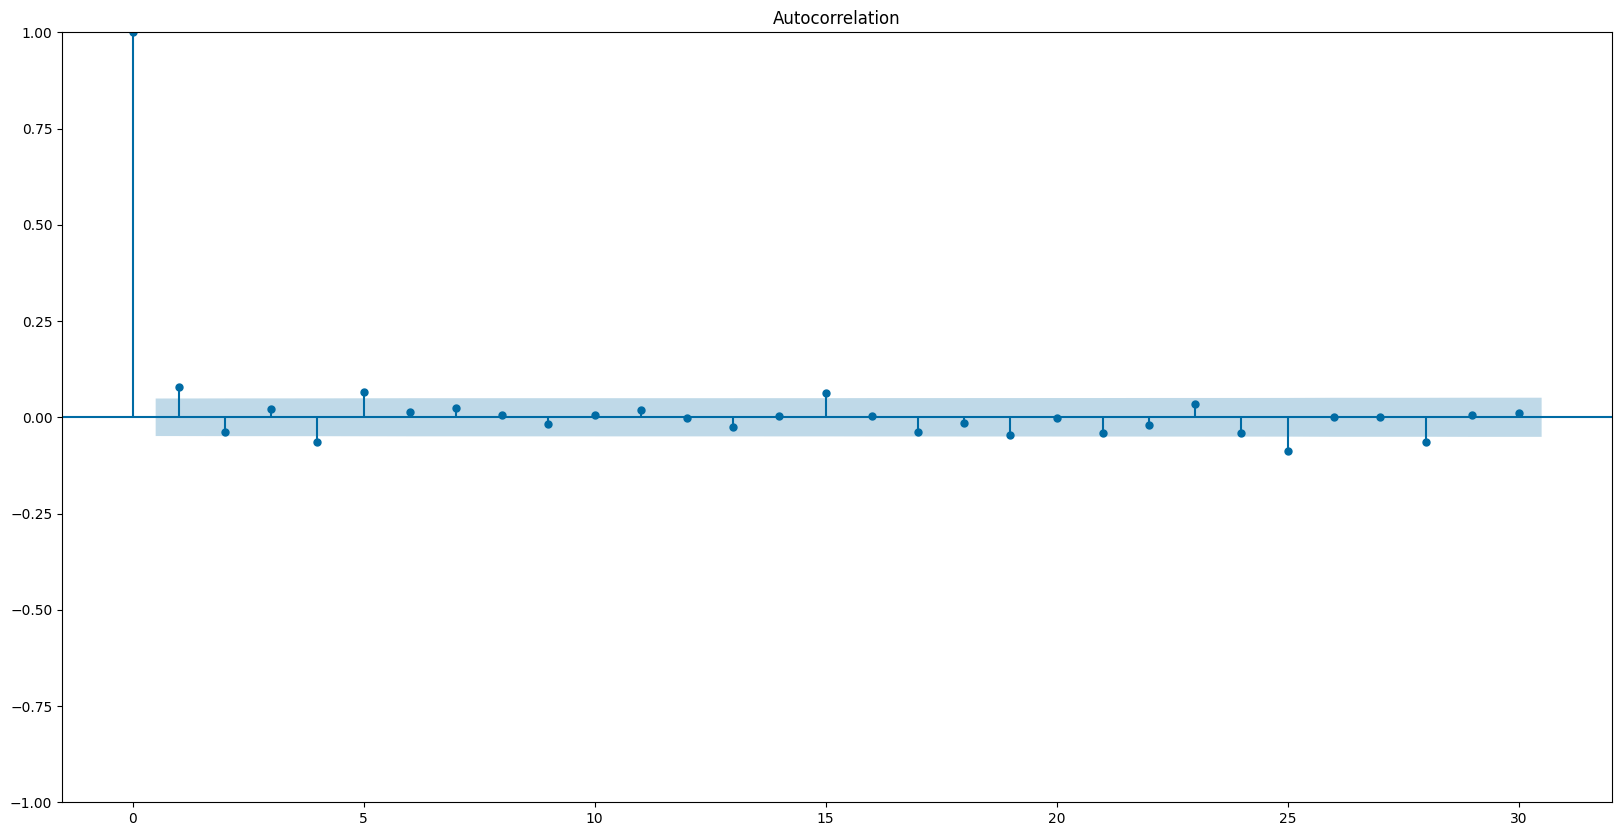

In [ ]:
ax = plot_acf(hlvr_diff.dropna(),lags=30)

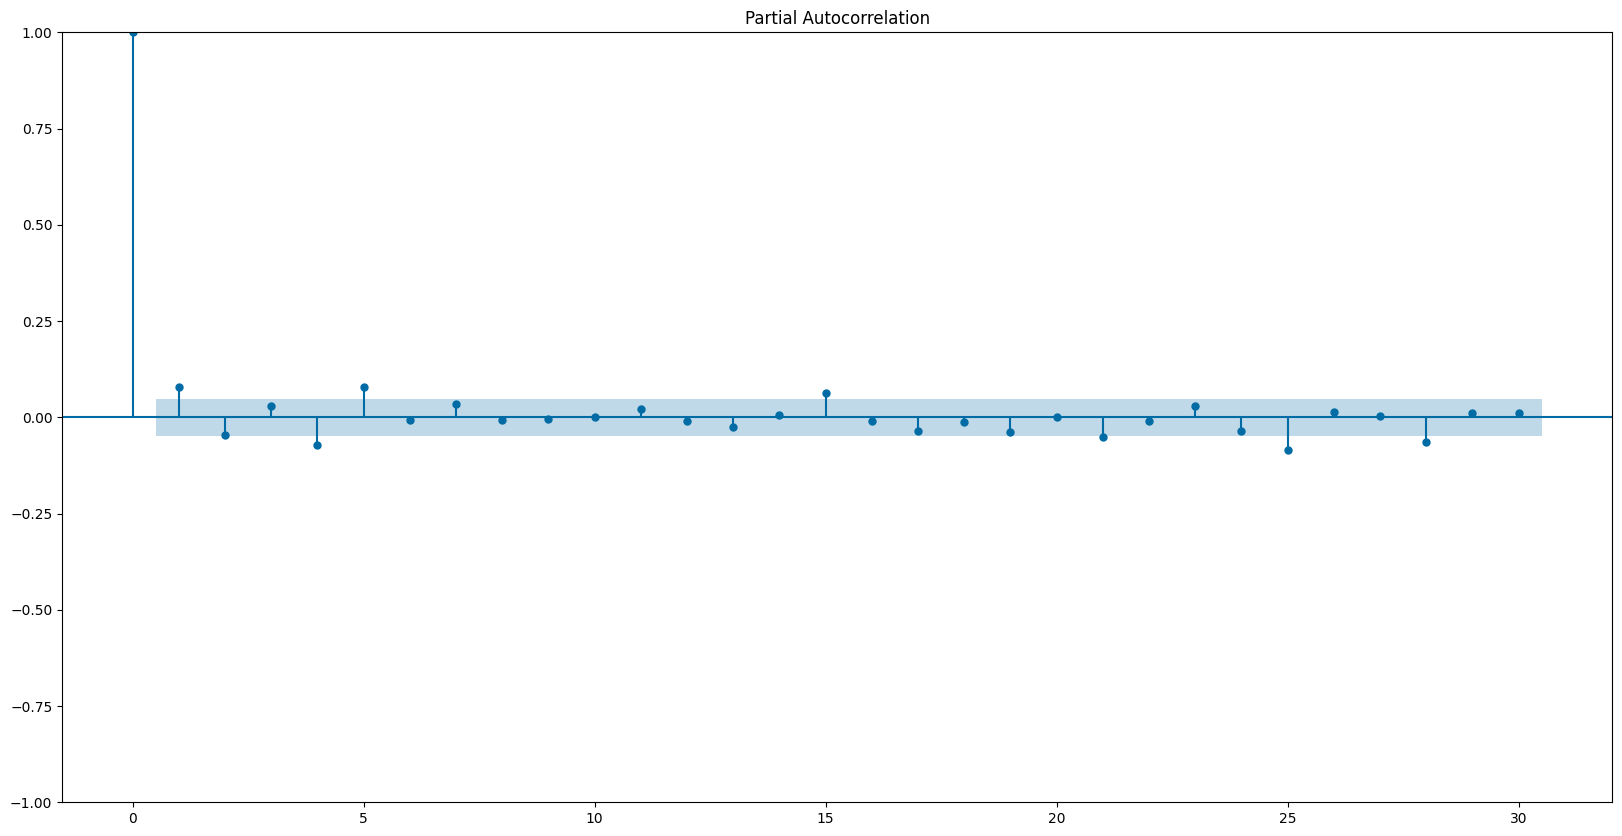

In [ ]:
x = plot_pacf(hlvr_diff.dropna(),lags=30)

In [ ]:
!pip install -q pmdarima
import pmdarima as pm
md = pm.auto_arima(hlvr_transformed.dropna(),max_p=20,max_q=20, trace=True,information_criterion='aic')
md

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9589.425, Time=5.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9583.185, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9591.509, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9592.493, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9584.853, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9606.724, Time=1.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9600.914, Time=1.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9591.948, Time=2.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9594.133, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9592.745, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9601.334, Time=0.28 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 13.736 seconds


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
# split into train and test sets
size = int(len(hlvr_transformed) * 0.8)
train, test = hlvr_transformed[0:size], hlvr_transformed[size:len(hlvr_transformed)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in tqdm(range(0,len(test),2)):
  model = ARIMA(history, order=(1,1,1))
  model_fit = model.fit()
  output = model_fit.forecast(steps=2)
  predictions.extend(output)
  if t + 1 < len(test):
    obs = test[t + 1]
    history.append(obs)

  0%|          | 0/162 [00:00<?, ?it/s]

In [ ]:
pred_df = pd.DataFrame(predictions,index=test.index).rename(columns={0:"predictions"})
actual_pred_df = pd.concat([test,pred_df],axis=1)
actual_pred = np.exp(actual_pred_df)
actual_pred

,HINDUNILVR.NS,predictions
Date,,
2023-12-15,2497.624255,2491.023648
2023-12-18,2509.954471,2490.836900
2023-12-19,2532.099717,2512.700376
2023-12-20,2538.018271,2510.737429
2023-12-21,2544.972821,2538.254987
...,...,...
2025-03-06,2229.800049,2177.745235
2025-03-07,2226.699951,2233.583257
2025-03-10,2267.149902,2232.326801


In [ ]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_percentage_error
print('Test MAPE: %.3f\n' % mean_absolute_percentage_error(actual_pred['HINDUNILVR.NS'] ,actual_pred.predictions))
print('Test RMSE: %.3f\n' % root_mean_squared_error(actual_pred['HINDUNILVR.NS'],actual_pred.predictions))

Test MAPE: 0.010

Test RMSE: 39.780



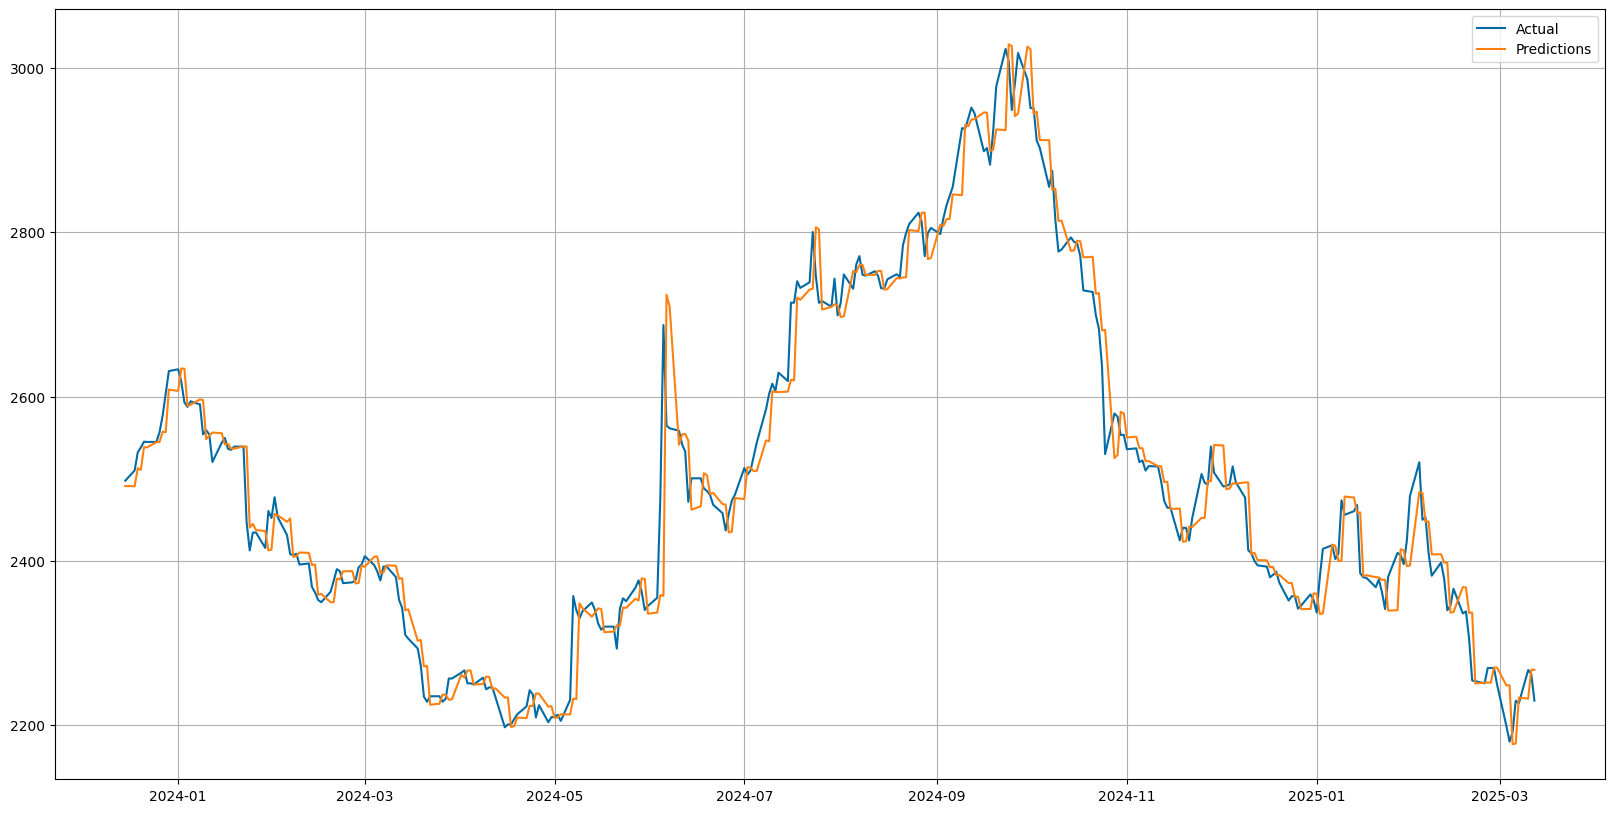

In [ ]:
plt.plot(actual_pred['HINDUNILVR.NS'],label="Actual")
plt.plot(actual_pred.predictions,label="Predictions")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
model = ARIMA(hlvr_transformed.dropna(), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
outputs = model_fit.forecast(steps=2)

                               SARIMAX Results                                
Dep. Variable:          HINDUNILVR.NS   No. Observations:                 1617
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4803.667
Date:                Wed, 12 Mar 2025   AIC                          -9601.334
Time:                        10:57:56   BIC                          -9585.171
Sample:                    01-01-2019   HQIC                         -9595.335
                         - 03-12-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4927      0.090     -5.469      0.000      -0.669      -0.316
ma.L1          0.5775      0.087      6.611      0.000       0.406       0.749
sigma2         0.0002   2.39e-06     64.182      0.0

In [ ]:
high_forecast_arima = np.exp(outputs)
high_forecast_arima

,predicted_mean
2025-03-13,2228.927030
2025-03-14,2229.430976


# Predicting low Price

In [ ]:
hlvr_low = data["High"]["HINDUNILVR.NS"]
hlvr_low.head()

,HINDUNILVR.NS
Date,
2019-01-01,1671.362784
2019-01-02,1656.753798
2019-01-03,1651.807900
2019-01-04,1650.479849
2019-01-07,1652.311639


In [ ]:
hlvr_low_transformed = np.log(hlvr_low)
hlvr_low_transformed = hlvr_low_transformed.resample("B").ffill()

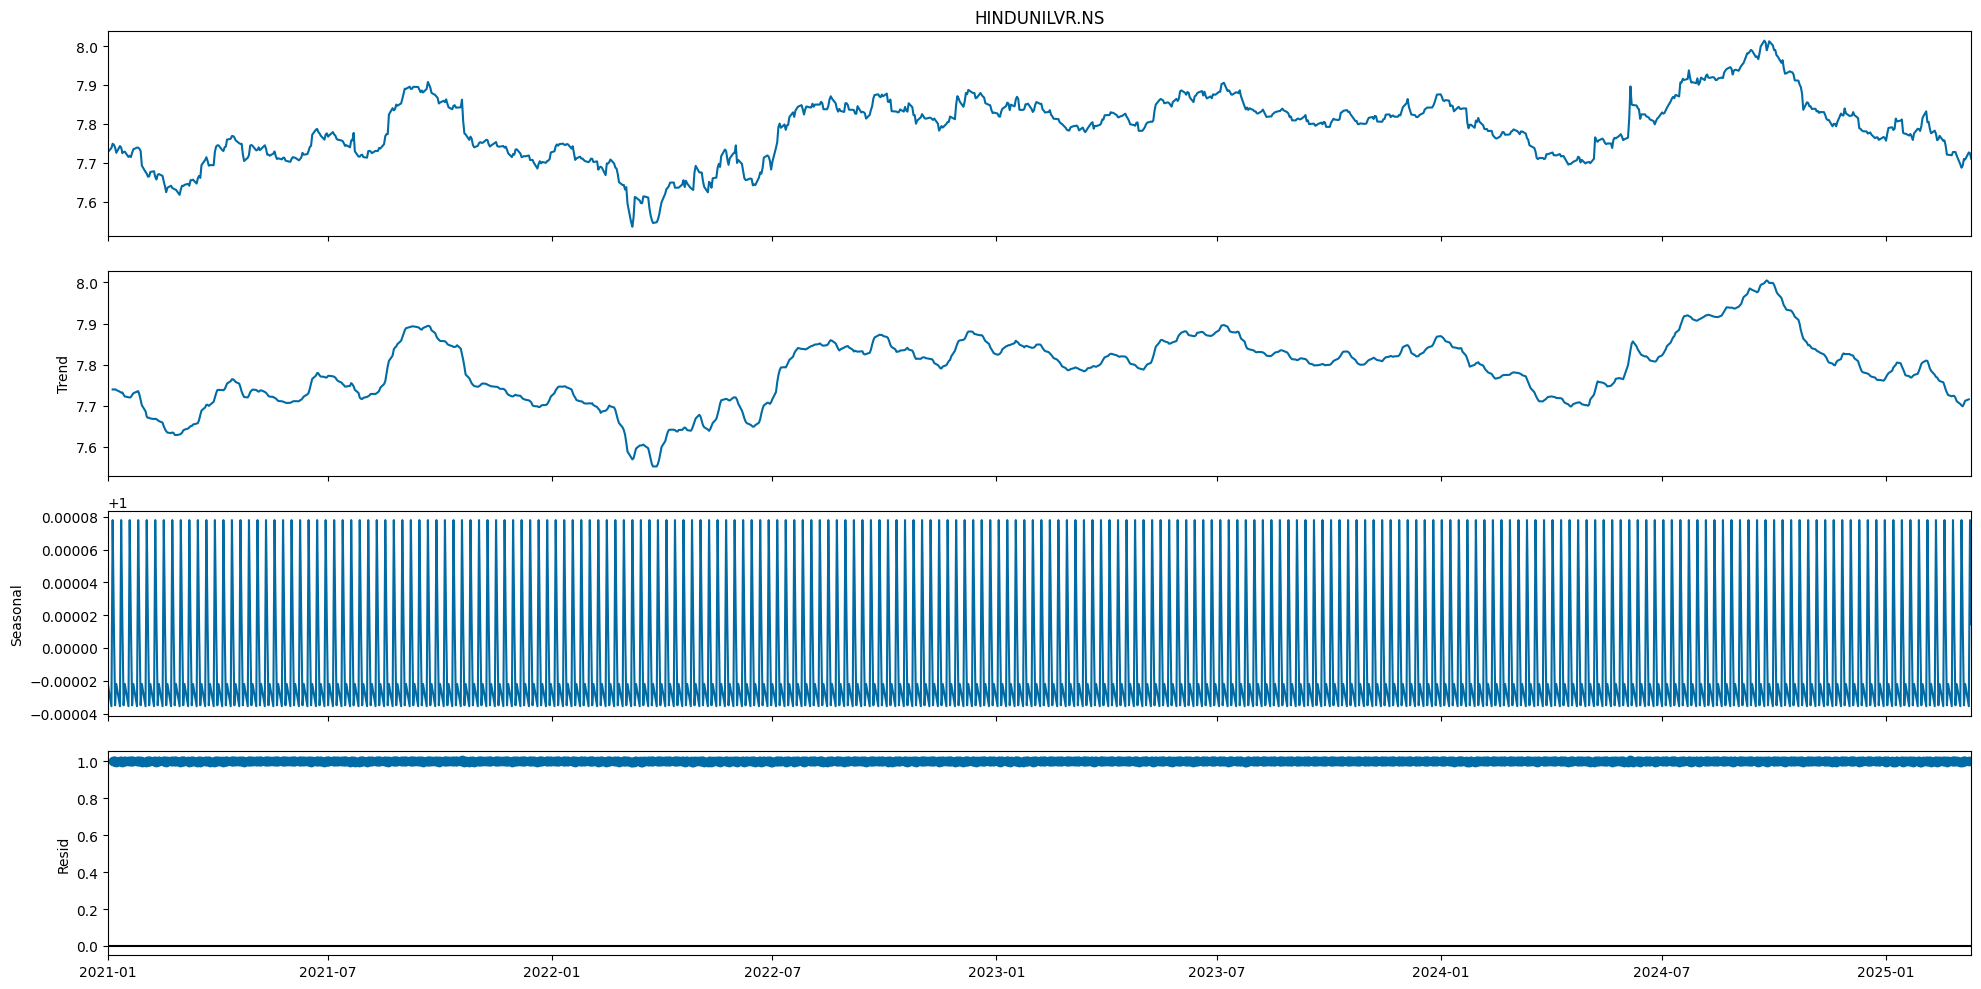

In [ ]:
# Decomposition
result = seasonal_decompose(hlvr_low_transformed.loc["2021-01-01":,].dropna(), model='multiplicative')
result.plot()
plt.show()

In [ ]:
res = adfuller(hlvr_low_transformed.dropna())
print(f"Test statistic: {res[0]}")
print(f"P-value : {res[1]}")

Test statistic: -2.3512364956414062
P-value : 0.15597494725867972


In [ ]:
hlvr_low_diff = hlvr_low_transformed.diff()
res = adfuller(hlvr_low_diff.dropna())
print(f"Test statistic: {res[0]}")
print(f"P-value : {res[1]}")

Test statistic: -17.234669877816465
P-value : 6.161242788927447e-30


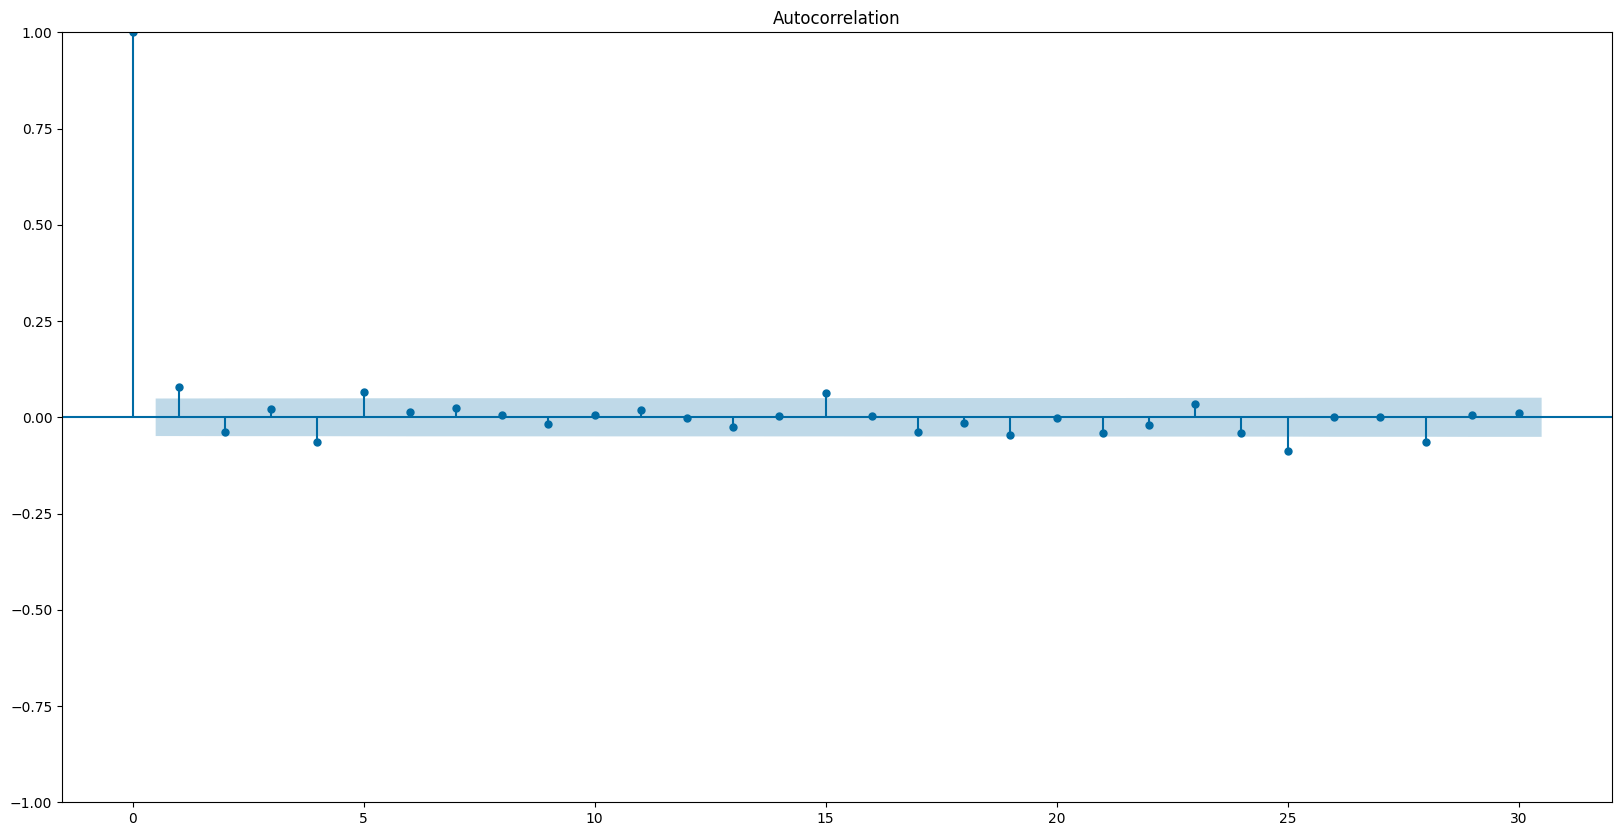

In [ ]:
ax = plot_acf(hlvr_low_diff.dropna(),lags=30)


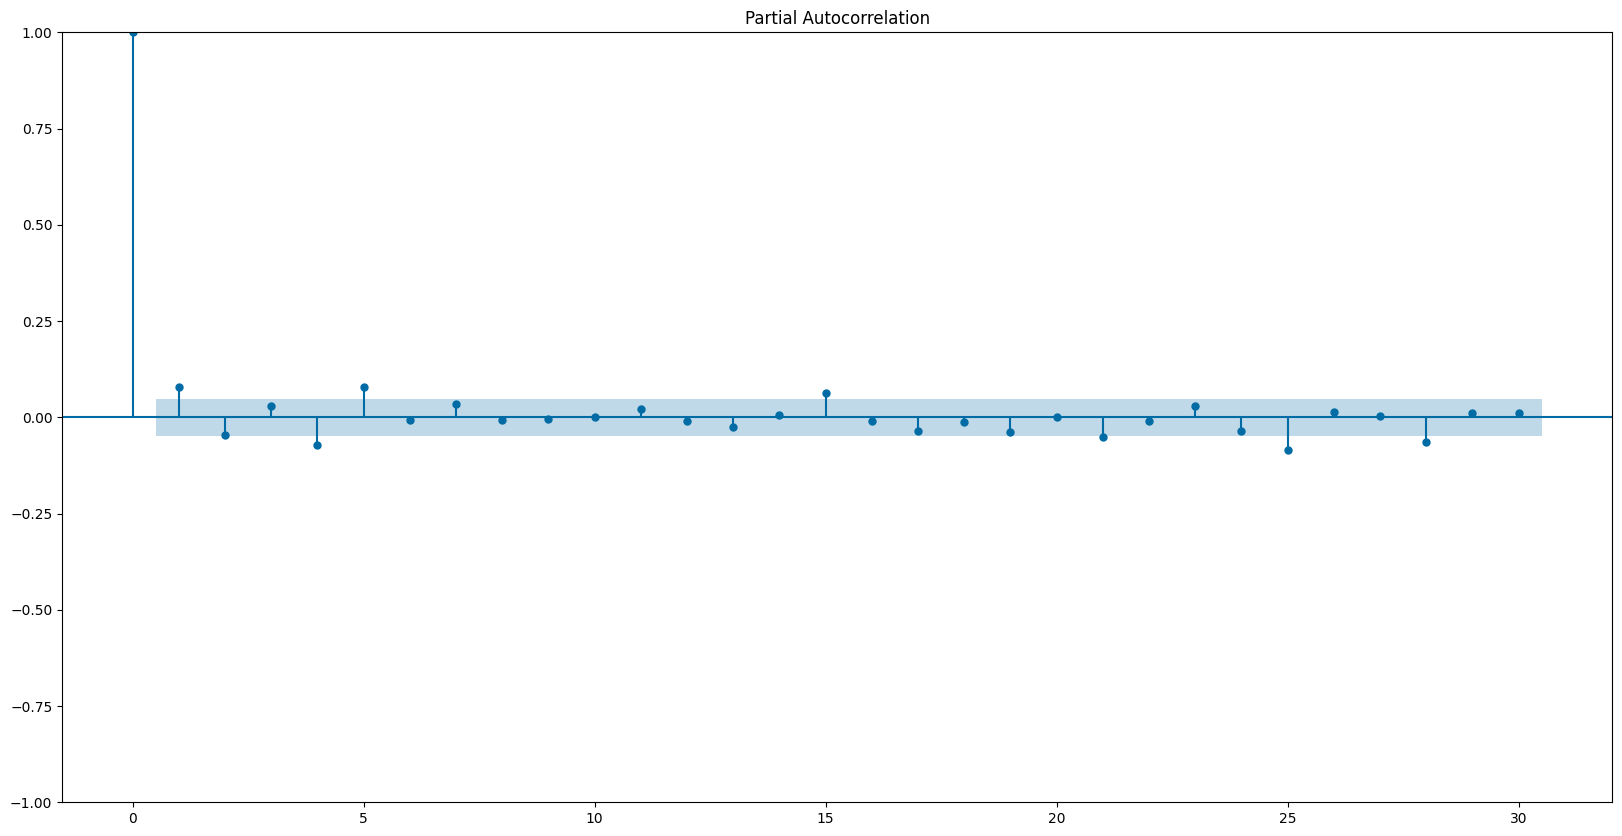

In [ ]:
ax = plot_pacf(hlvr_low_diff.dropna(),lags=30)


In [ ]:
md = pm.auto_arima(hlvr_low_transformed.dropna(),max_p=20,max_q=20, trace=True,information_criterion='aic')
md

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9589.425, Time=7.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9583.185, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9591.509, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9592.493, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9584.853, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9606.724, Time=1.98 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9600.914, Time=1.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9591.948, Time=2.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9594.133, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9592.745, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9601.334, Time=0.46 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 15.955 seconds


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
# split into train and test sets
size = int(len(hlvr_low_transformed.dropna()) * 0.8)
train, test = hlvr_low_transformed.dropna()[0:size], hlvr_low_transformed.dropna()[size:len(hlvr_low_transformed.dropna())]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in tqdm(range(0,len(test),2)):
  model = ARIMA(history, order=(1,1,1))
  model_fit = model.fit()
  output = model_fit.forecast(steps=2)
  predictions.extend(output)
  if t + 1 < len(test):
    obs = test[t + 1]
    history.append(obs)

  0%|          | 0/162 [00:00<?, ?it/s]

In [ ]:
pred_df = pd.DataFrame(predictions,index=test.index).rename(columns={0:"predictions"})
actual_pred_df = pd.concat([test,pred_df],axis=1)
actual_pred = np.exp(actual_pred_df)
actual_pred

,HINDUNILVR.NS,predictions
Date,,
2023-12-15,2497.624255,2491.023648
2023-12-18,2509.954471,2490.836900
2023-12-19,2532.099717,2512.700376
2023-12-20,2538.018271,2510.737429
2023-12-21,2544.972821,2538.254987
...,...,...
2025-03-06,2229.800049,2177.745235
2025-03-07,2226.699951,2233.583257
2025-03-10,2267.149902,2232.326801


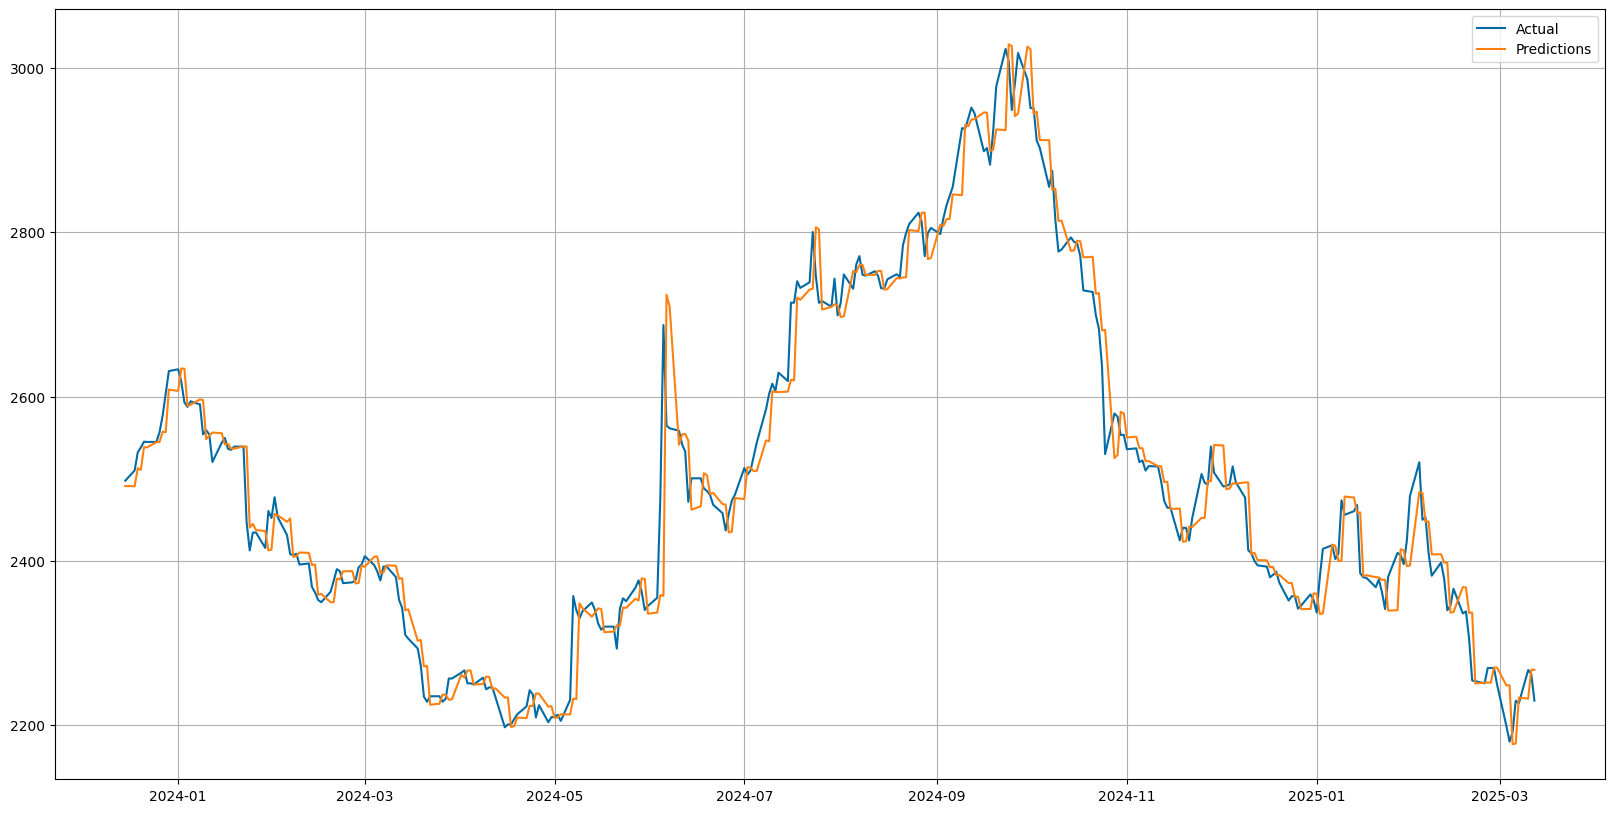

In [ ]:
plt.plot(actual_pred['HINDUNILVR.NS'],label="Actual")
plt.plot(actual_pred.predictions,label="Predictions")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_percentage_error
print('Test MAPE: %.3f\n' % mean_absolute_percentage_error(actual_pred['HINDUNILVR.NS'] ,actual_pred.predictions))
print('Test RMSE: %.3f\n' % root_mean_squared_error(actual_pred['HINDUNILVR.NS'],actual_pred.predictions))

Test MAPE: 0.010

Test RMSE: 39.780



In [ ]:
model = ARIMA(hlvr_low_transformed.dropna(), order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())
outputs = model_fit.forecast(steps=2)

                               SARIMAX Results                                
Dep. Variable:          HINDUNILVR.NS   No. Observations:                 1617
Model:                 ARIMA(0, 1, 1)   Log Likelihood                4799.108
Date:                Wed, 12 Mar 2025   AIC                          -9594.215
Time:                        11:13:53   BIC                          -9583.440
Sample:                    01-01-2019   HQIC                         -9590.216
                         - 03-12-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0848      0.011      7.951      0.000       0.064       0.106
sigma2         0.0002    2.3e-06     67.115      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:
low_forecast_arima=np.exp(outputs)
low_forecast_arima

,predicted_mean
2025-03-13,2227.273733
2025-03-14,2227.273733


In [ ]:
all_low_vals = pd.concat([hlvr_low.loc['2023-03-29':,],low_forecast_arima],axis=0).rename("Low")
all_high_vals = pd.concat([hlvr_high.loc['2023-03-29':,],high_forecast_arima],axis=0).rename("High")
all_vals = pd.concat([all_low_vals,all_high_vals],axis=1)
all_vals.tail()

,Low,High
2025-03-10,2267.149902,2267.149902
2025-03-11,2262.449951,2262.449951
2025-03-12,2229.949951,2229.949951
2025-03-13,2227.273733,2228.927030
2025-03-14,2227.273733,2229.430976


## Measuring volatility

In [13]:
hlvr = data["Close"]['HINDUNILVR.NS']
hlvr.head()

,HINDUNILVR.NS
Date,
2019-01-01,1649.655518
2019-01-02,1634.542969
2019-01-03,1638.023315
2019-01-04,1631.886719
2019-01-07,1634.863525


In [14]:
hlvr = hlvr.to_frame()
hlvr["returns"] = np.log(hlvr['HINDUNILVR.NS']/hlvr['HINDUNILVR.NS'].shift(1))
hlvr = hlvr.dropna()
hlvr

,HINDUNILVR.NS,returns
Date,,
2019-01-02,1634.542969,-0.009203
2019-01-03,1638.023315,0.002127
2019-01-04,1631.886719,-0.003753
2019-01-07,1634.863525,0.001822
2019-01-08,1621.948975,-0.007931
...,...,...
2025-03-06,2218.949951,0.022100
2025-03-07,2204.550049,-0.006511
2025-03-10,2247.750000,0.019406


In [15]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(hlvr.returns)
print(f"Test statistic: {res[0]}")
print(f"P-value : {res[1]}")

Test statistic: -11.916143049305257
P-value : 5.1593739919296655e-22


In [ ]:
!pip install -q arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 16.9 MB/s eta 0:00:00


In [19]:
lagged_returns = hlvr.returns.shift(1).dropna()
X = sm.add_constant(lagged_returns)
y = hlvr.returns.iloc[1:]
model = sm.OLS(y, X).fit()
alpha, beta = model.params

In [20]:
predicted_returns = model.predict(X)
residuals = y - predicted_returns
residual_diff =residuals.diff()
sigma = np.std(residual_diff.dropna())

cl = residuals.mean()
ucl = cl + 2 * sigma
lcl = cl - 2 * sigma

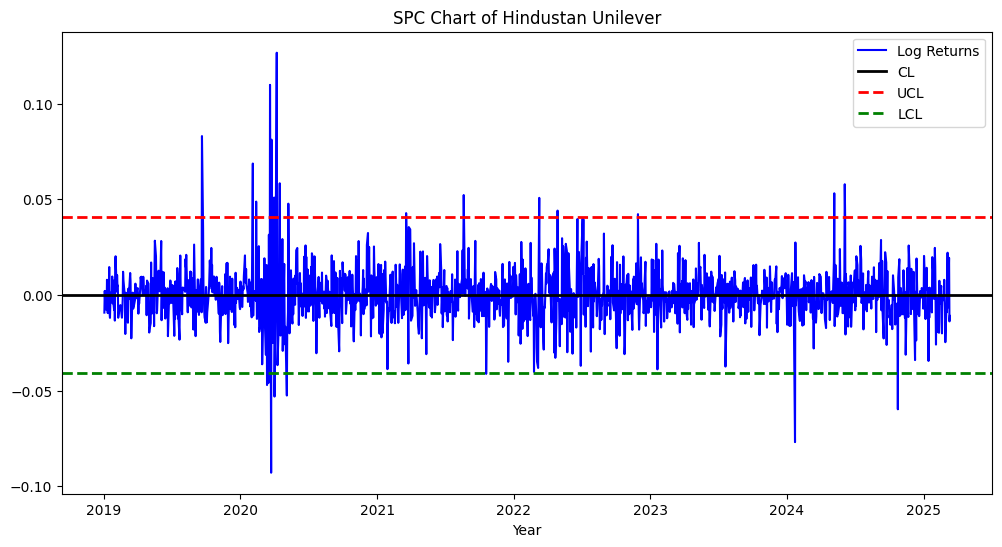

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(hlvr.returns.index, hlvr.returns, label='Log Returns', color='blue')

plt.axhline(cl, color='black', linewidth=2, label='CL')
plt.axhline(ucl, color='red', linestyle='--', linewidth=2, label='UCL')
plt.axhline(lcl, color='green', linestyle='--', linewidth=2, label='LCL')

plt.title('SPC Chart of Hindustan Unilever')
plt.xlabel('Year')
plt.legend()
plt.savefig('Hindustan unilever.png')
plt.show()

In [ ]:
from arch import arch_model
import statsmodels.api as sm

In [ ]:
model = arch_model(hlvr['returns'], vol = 'GARCH', p = 1, q = 1, rescale = False)
results = model.fit(disp='off',show_warning = False)
residuals = results.resid
squared_residuals = residuals**2
arch_test = sm.stats.diagnostic.het_arch(squared_residuals)
print(f'ARCH test results:\n')
print(f'LM Statistic: {arch_test[0]}')
print(f'p-value: {arch_test[1]}')
print(f'F Statistic: {arch_test[2]}')
print(f'p-value: {arch_test[3]}')

ARCH test results:

LM Statistic: 262.5452182218153
p-value: 1.244082267221278e-50
F Statistic: 31.50238572376596
p-value: 9.258560564452701e-56


In [ ]:
p_q_vals = list(permutations(range(1,11),2))
min_val = 0
min_aic = float('inf')
best_p, best_q = None, None
for i in p_q_vals:
  p , q  = i[0],i[1]
  model = arch_model(hlvr.returns, vol='Garch', p=p, q=q)
  model_fit = model.fit(disp=False)
  if model_fit.aic < min_aic:
    min_aic = model_fit.aic
    best_p, best_q = p, q
  print("AIC value for (%d , %d) : %g" % (p,q,model_fit.aic))

print("\nBest (p, q) pair with the minimum AIC:", best_p, best_q)
print("Minimum AIC:", min_aic)

AIC value for (1 , 2) : -8901.6
AIC value for (1 , 3) : -8900.65
AIC value for (1 , 4) : -8895.3
AIC value for (1 , 5) : -8890.87
AIC value for (1 , 6) : -8896.01
AIC value for (1 , 7) : -8892.79
AIC value for (1 , 8) : -8890.94
AIC value for (1 , 9) : -8889.13
AIC value for (1 , 10) : -8885.42
AIC value for (2 , 1) : -8887.14
AIC value for (2 , 3) : -8889.03
AIC value for (2 , 4) : -8885.22
AIC value for (2 , 5) : -8887.55
AIC value for (2 , 6) : -8887.43
AIC value for (2 , 7) : -8885.65
AIC value for (2 , 8) : -8884.44
AIC value for (2 , 9) : -8882.21
AIC value for (2 , 10) : -8879.65
AIC value for (3 , 1) : -8878.1
AIC value for (3 , 2) : -8880.84
AIC value for (3 , 4) : -8879.76
AIC value for (3 , 5) : -8879.96
AIC value for (3 , 6) : -8879.79
AIC value for (3 , 7) : -8878.32
AIC value for (3 , 8) : -8876.21
AIC value for (3 , 9) : -8874.28
AIC value for (3 , 10) : -8872.13
AIC value for (4 , 1) : -8871.23
AIC value for (4 , 2) : -8873.68
AIC value for (4 , 3) : -8873.38
AIC value 

In [ ]:
model = arch_model(hlvr.returns, vol='Garch', p=1, q=2)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1.9766638300522778e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: -4455.84713409166
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4455.84713777312
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4455.85
Distribution:                  Normal   AIC:                          -8901.69
Method:            Maximum Likelihood   BIC:                          -8875.03
                                        No. Observations:                 1531
Date:                Sun, Mar 16 2025   Df Residuals:                     1530
Time:       

                 h.1       h.2
Date                          
2025-03-12  0.000194  0.000195


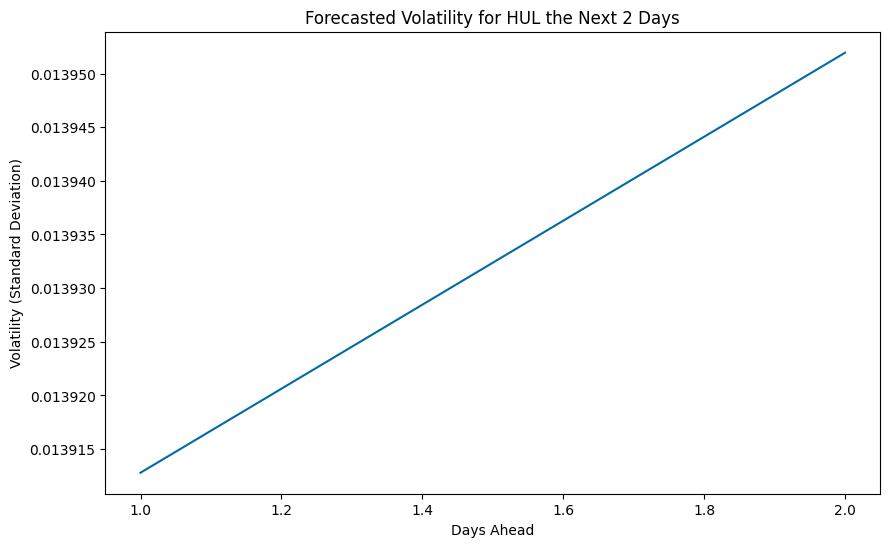

In [ ]:
forecast_horizon = 2
forecast = model_fit.forecast(horizon=forecast_horizon)

print(forecast.variance[-1:])

# Plot the forecasted volatility
forecasted_volatility = np.sqrt(forecast.variance.values[-1, :])
plt.figure(figsize=(10, 6))
plt.plot(range(1, forecast_horizon + 1), forecasted_volatility)
plt.title(f'Forecasted Volatility for HUL the Next {forecast_horizon} Days')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility (Standard Deviation)')
plt.savefig('garch_hlvr.jpeg')
plt.show()

In [24]:
adffoods = yf.download("ADFFOODS.NS",start = "2019-01-01",multi_level_index=False)
adffoods.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2019-01-01,51.509575,52.148437,50.832571,51.490504,99945
2019-01-02,51.404686,52.348680,50.956527,51.623997,108745
2019-01-03,51.109089,51.852843,50.746751,51.109089,157150
2019-01-04,50.422558,52.119836,50.155568,52.119836,127975
2019-01-07,50.289059,51.423755,50.060210,51.423755,86400


In [25]:
adffoods["returns"] = np.log(adffoods.Close/adffoods.Close.shift(1))
adffoods.dropna(inplace=True)
adffoods.head()

,Close,High,Low,Open,Volume,returns
Date,,,,,,
2019-01-02,51.404686,52.348680,50.956527,51.623997,108745,-0.002038
2019-01-03,51.109089,51.852843,50.746751,51.109089,157150,-0.005767
2019-01-04,50.422558,52.119836,50.155568,52.119836,127975,-0.013524
2019-01-07,50.289059,51.423755,50.060210,51.423755,86400,-0.002651
2019-01-08,50.660934,50.918387,49.678798,50.536975,81585,0.007368


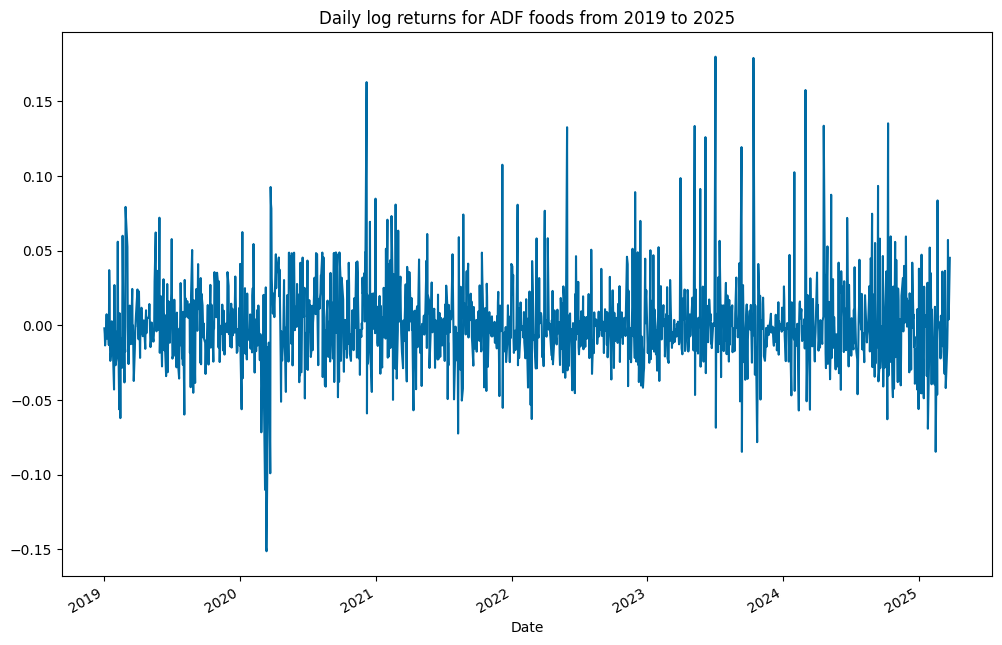

In [26]:
plt.figure(figsize=(12,8))
adffoods['returns'].plot()
plt.title('Daily log returns for ADF foods from 2019 to 2025')
plt.show()

In [27]:
lagged_returns = adffoods["returns"].shift(1).dropna()
X = sm.add_constant(lagged_returns)
y = adffoods["returns"].iloc[1:]
model = sm.OLS(y, X).fit()
alpha, beta = model.params

predicted_returns = model.predict(X)
residuals = y - predicted_returns
residual_diff =residuals.diff()
sigma = np.std(residual_diff.dropna())

In [28]:

cl = residuals.mean()
ucl = cl + 2 * sigma
lcl = cl - 2 * sigma

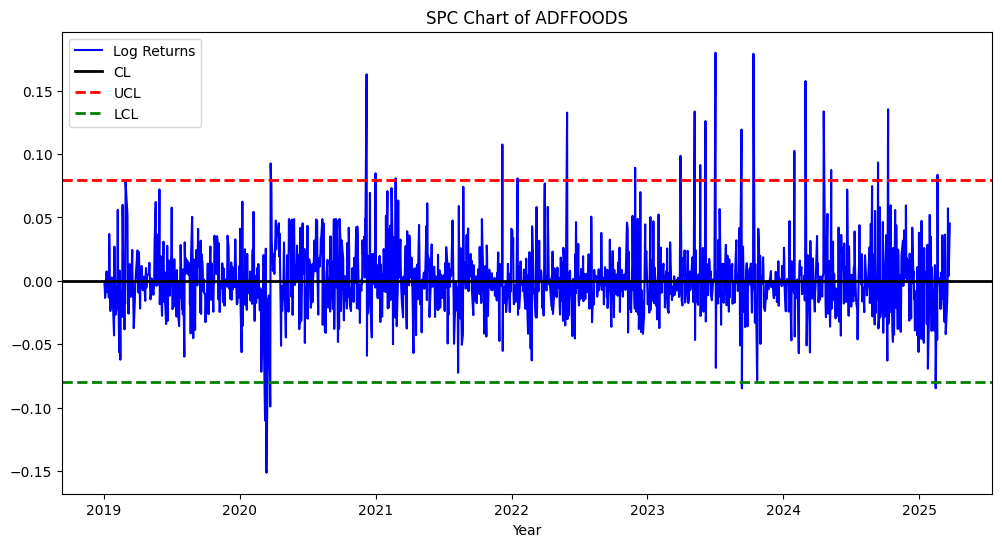

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(adffoods.index, adffoods.returns, label='Log Returns', color='blue')

plt.axhline(cl, color='black', linewidth=2, label='CL')
plt.axhline(ucl, color='red', linestyle='--', linewidth=2, label='UCL')
plt.axhline(lcl, color='green', linestyle='--', linewidth=2, label='LCL')

plt.title('SPC Chart of ADFFOODS')
plt.xlabel('Year')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(adffoods.returns)
print(f"Test statistic: {res[0]}")
print(f"P-value : {res[1]}")

Test statistic: -39.123887855226045
P-value : 0.0


In [ ]:
adffoods_diff=adffoods.returns.diff().dropna()
model = arch_model(adffoods_diff, vol = 'ARCH', p = 1, q = 1, rescale = False)
results = model.fit(disp='off',show_warning = False)
residuals = results.resid
squared_residuals = residuals**2
arch_test = sm.stats.diagnostic.het_arch(squared_residuals)
print(f'ARCH test results:\n')
print(f'LM Statistic: {arch_test[0]}')
print(f'p-value: {arch_test[1]}')
print(f'F Statistic: {arch_test[2]}')
print(f'p-value: {arch_test[3]}')

ARCH test results:

LM Statistic: 64.72796456120011
p-value: 4.569115545546552e-10
F Statistic: 6.711604982372791
p-value: 2.7983428976301166e-10


In [ ]:
p_q_vals = list(permutations(range(1,11),2))
min_val = 0
min_aic = float('inf')
best_p, best_q = None, None
for i in p_q_vals:
  p , q  = i[0],i[1]
  model = arch_model(adffoods_diff, vol='Garch', p=p, q=q)
  model_fit = model.fit(disp=False)
  if model_fit.aic < min_aic:
    min_aic = model_fit.aic
    best_p, best_q = p, q
  print("AIC value for (%d , %d) : %g" % (p,q,model_fit.aic))

print("\nBest (p, q) pair with the minimum AIC:", best_p, best_q)
print("Minimum AIC:", min_aic)

AIC value for (1 , 2) : -5845.07
AIC value for (1 , 3) : -5776.39
AIC value for (1 , 4) : -5820.78
AIC value for (1 , 5) : -5776.52
AIC value for (1 , 6) : -5776.55
AIC value for (1 , 7) : -5774.96
AIC value for (1 , 8) : -5773.86
AIC value for (1 , 9) : -5772.92
AIC value for (1 , 10) : -5803.61
AIC value for (2 , 1) : -5845.09
AIC value for (2 , 3) : -5736.57
AIC value for (2 , 4) : -5697.98
AIC value for (2 , 5) : -5698.83
AIC value for (2 , 6) : -5766.4
AIC value for (2 , 7) : -5696.97
AIC value for (2 , 8) : -5696.4
AIC value for (2 , 9) : -5707.96
AIC value for (2 , 10) : -5717.13
AIC value for (3 , 1) : -5843.09
AIC value for (3 , 2) : -5760.59
AIC value for (3 , 4) : -5748.72
AIC value for (3 , 5) : -5650.76
AIC value for (3 , 6) : -5650.11
AIC value for (3 , 7) : -5840
AIC value for (3 , 8) : -5722.48
AIC value for (3 , 9) : -5646.47
AIC value for (3 , 10) : -5681.95
AIC value for (4 , 1) : -5841.64
AIC value for (4 , 2) : -5757.59
AIC value for (4 , 3) : -5728.69
AIC value fo

In [ ]:
model = arch_model(adffoods_diff, vol='Garch', p=2, q=1)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 57317557.89392818
Iteration:      2,   Func. Count:     19,   Neg. LLF: 693061.4789121667
Iteration:      3,   Func. Count:     31,   Neg. LLF: 225393.43874527782
Iteration:      4,   Func. Count:     39,   Neg. LLF: -671.2198369835451
Iteration:      5,   Func. Count:     46,   Neg. LLF: 227.16735388764644
Iteration:      6,   Func. Count:     53,   Neg. LLF: 6965.088917812394
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1506061300.3938909
Iteration:      8,   Func. Count:     73,   Neg. LLF: -1471.9341640181324
Iteration:      9,   Func. Count:     82,   Neg. LLF: 792.1822503315238
Iteration:     10,   Func. Count:     92,   Neg. LLF: -2856.158237444331
Iteration:     11,   Func. Count:     99,   Neg. LLF: 886811285.6291745
Iteration:     12,   Func. Count:    107,   Neg. LLF: -2695.03089010546
Iteration:     13,   Func. Count:    114,   Neg. LLF: -2927.211571720718
Iteration:     14,   Func. Count:    120,   Neg. LLF: -2

                 h.1       h.2
Date                          
2025-03-13  0.001942  0.001749


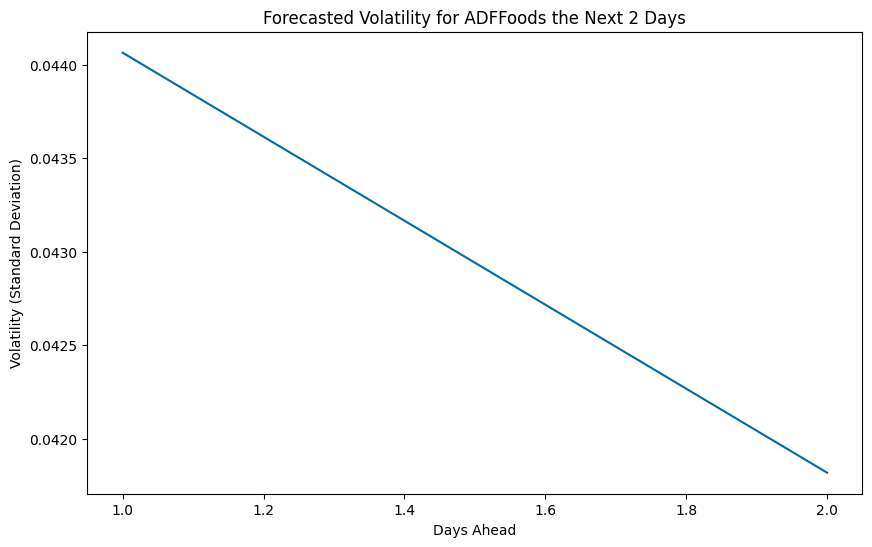

In [ ]:
forecast_horizon = 2
forecast = model_fit.forecast(horizon=forecast_horizon)

print(forecast.variance[-1:])

# Plot the forecasted volatility
forecasted_volatility = np.sqrt(forecast.variance.values[-1, :])
plt.figure(figsize=(10, 6))
plt.plot(range(1, forecast_horizon + 1), forecasted_volatility)
plt.title(f'Forecasted Volatility for ADFFoods the Next {forecast_horizon} Days')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility (Standard Deviation)')
plt.show()